# Description: This program uses Artificial Neural Network (ANN) to classify handwritten digits as numbers 0 - 9

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import mnist

### Load data and split it into train and test sets

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


### Get the image shape

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Take a look at first image (at index=0) in the training data set

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Print the image label

In [6]:
y_train[0]

5

### Show the image as a picture

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

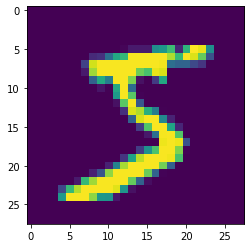

In [8]:
plt.imshow(x_train[0])

# Data normalisation

### Normalize the data dimensions so that they are of approximately the same scale

In [9]:
x_train_n=x_train/255.
x_test_n=x_test/255.

In [10]:
print(x_train_n[0])
print(x_test_n[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
x_valid,x_train = x_train_n[:5000], x_train_n[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:]
x_test = x_test_n

In [12]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Build ANN Model and adding Model layers

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
import pydot
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
weights,biases=model.layers[1].get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

# Compile and Train the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [23]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6196 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2430 - accuracy: 0.9302 - val_loss: 0.2060 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2076 - accuracy: 0.9407 - val_loss: 0.1824 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1811 - accuracy: 0.9487 - val_loss: 0.1644 - val_accuracy: 0.9538
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1603 - accuracy: 0.9542 - val_loss: 0.1484 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1431 - accuracy: 0.9597 - val_loss: 0.1368 - val_accuracy:

In [24]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
model_history.history

{'loss': [0.6196319460868835,
  0.2953492999076843,
  0.24302871525287628,
  0.2075793445110321,
  0.18108052015304565,
  0.16030652821063995,
  0.14314760267734528,
  0.12919147312641144,
  0.11745200306177139,
  0.10772261768579483,
  0.0987585037946701,
  0.09112159162759781,
  0.08430469781160355,
  0.07808171212673187,
  0.07258383929729462,
  0.06770499050617218,
  0.06321170926094055,
  0.059217873960733414,
  0.05548643320798874,
  0.05192795768380165,
  0.04879852011799812,
  0.045817770063877106,
  0.04311557486653328,
  0.040367983281612396,
  0.038332466036081314,
  0.03596340864896774,
  0.0339919738471508,
  0.03209015727043152,
  0.029990600422024727,
  0.028489669784903526],
 'accuracy': [0.8404726982116699,
  0.9151272773742676,
  0.9301999807357788,
  0.9406545162200928,
  0.9486727118492126,
  0.9542182087898254,
  0.9596909284591675,
  0.9632545709609985,
  0.9672726988792419,
  0.9696727395057678,
  0.9719454646110535,
  0.97447270154953,
  0.9761090874671936,
  0.

### Visualize the Models loss and accuracy

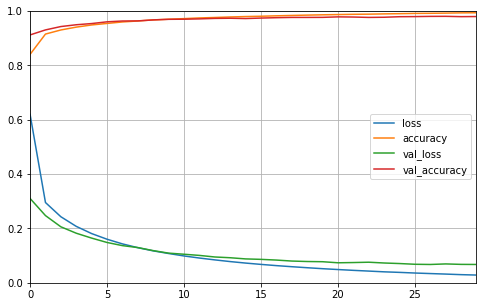

In [26]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluation performance and prediction of classes

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9799


[0.06915471702814102, 0.9799000024795532]

In [28]:
x_new = x_test[:3]

### Show predictions as probibilities for the first 3 images in the test set

In [29]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Show predictions of classes for the first 3 images in the test set

In [30]:
y_pred=model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1], dtype=int64)

### Print the actual labels

In [31]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

### Show the first 3 images as pictures in test set

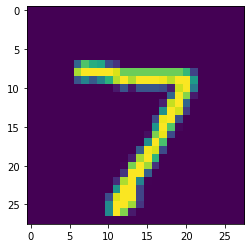

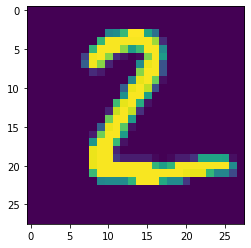

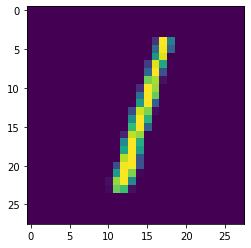

In [32]:
for i in range (0,3):
    plt.imshow(x_test[i])
    plt.show()